In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None



In [ ]:
acao = "MGLU3.SA"

inicio = "2014-12-31"
final = "2023-09-15"

dados_acao = yf.download(acao, inicio, final)

dados_acao

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.279850,2.279850,2.165858,2.177549,2.058074,676044
2015-01-05,2.203855,2.250621,2.148320,2.218470,2.096750,1104046
2015-01-06,2.230161,2.230161,2.180472,2.189241,2.069124,1344219
2015-01-07,2.221392,2.265236,2.195086,2.262313,2.138187,690071
2015-01-08,2.238930,2.265236,2.221392,2.244776,2.121613,897400
...,...,...,...,...,...,...
2023-09-08,23.850744,23.944277,23.383083,23.476616,23.476616,7295573
2023-09-11,23.663679,24.131342,23.102486,23.850744,23.850744,7102944
2023-09-12,23.850744,24.786068,23.570148,24.505470,24.505470,10327081


In [ ]:
cotacao = dados_acao['Close'].to_numpy().reshape(-1,1)

cotacao

array([[ 2.17754889],
       [ 2.2184701 ],
       [ 2.18924093],
       ...,
       [24.50547028],
       [24.50547028],
       [24.13134193]])

In [ ]:
tamanho_dados_treinamento = int(len(cotacao)*0.8)

tamanho_dados_treinamento

1732

In [ ]:
#escalar os dados entre 0 e 1, para deixar mais facil o processamento
#dados em escala pré definidas são mais faceis de lidar

escalador = MinMaxScaler(feature_range=(0,1))
dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento:, :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

dados_entre_0_e_1

array([[0.0073753 ],
       [0.00753487],
       [0.00742089],
       ...,
       [0.09443725],
       [0.09443725],
       [0.09297843]])

In [ ]:
dados_para_treinamento =  dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

treinamento_x = []
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):
  treinamento_x.append(dados_para_treinamento[i-60:i,0])

  treinamento_y.append(dados_para_treinamento[i,0])

  if i <= 61:

    print(treinamento_x)
    print(treinamento_y)


[array([0.0073753 , 0.00753487, 0.00742089, 0.00770582, 0.00763744,
       0.00734111, 0.00743229, 0.00734111, 0.00720435, 0.00718156,
       0.00724994, 0.00720435, 0.00686244, 0.00691942, 0.00688523,
       0.00691942, 0.00686244, 0.0066345 , 0.00641796, 0.00669148,
       0.0066345 , 0.00668009, 0.00636097, 0.00628119, 0.00617862,
       0.00582531, 0.00575693, 0.00588229, 0.00549479, 0.00560877,
       0.00582531, 0.0058595 , 0.00613303, 0.00612163, 0.00620141,
       0.00640656, 0.00622421, 0.00638376, 0.00577972, 0.00581391,
       0.00558597, 0.00520987, 0.00514149, 0.00495913, 0.00466281,
       0.00491355, 0.00486796, 0.00515288, 0.00487935, 0.004697  ,
       0.00462862, 0.00457163, 0.0046856 , 0.0047084 , 0.0047084 ,
       0.00466281, 0.00458303, 0.00456024, 0.00452605, 0.00462862])]
[0.00468560493103504]
[array([0.0073753 , 0.00753487, 0.00742089, 0.00770582, 0.00763744,
       0.00734111, 0.00743229, 0.00734111, 0.00720435, 0.00718156,
       0.00724994, 0.00720435, 0.006

In [ ]:
#transformando as listas em arrays e dando reshape 3d

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

print(treinamento_x)

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

print(treinamento_x)

[[0.0073753  0.00753487 0.00742089 ... 0.00456024 0.00452605 0.00462862]
 [0.00753487 0.00742089 0.00770582 ... 0.00452605 0.00462862 0.0046856 ]
 [0.00742089 0.00770582 0.00763744 ... 0.00462862 0.0046856  0.00485656]
 ...
 [0.59663621 0.59481266 0.57767149 ... 0.20822524 0.22390757 0.23229579]
 [0.59481266 0.57767149 0.56891861 ... 0.22390757 0.23229579 0.24177812]
 [0.57767149 0.56891861 0.54630687 ... 0.23229579 0.24177812 0.22974285]]
[[[0.0073753 ]
  [0.00753487]
  [0.00742089]
  ...
  [0.00456024]
  [0.00452605]
  [0.00462862]]

 [[0.00753487]
  [0.00742089]
  [0.00770582]
  ...
  [0.00452605]
  [0.00462862]
  [0.0046856 ]]

 [[0.00742089]
  [0.00770582]
  [0.00763744]
  ...
  [0.00462862]
  [0.0046856 ]
  [0.00485656]]

 ...

 [[0.59663621]
  [0.59481266]
  [0.57767149]
  ...
  [0.20822524]
  [0.22390757]
  [0.23229579]]

 [[0.59481266]
  [0.57767149]
  [0.56891861]
  ...
  [0.22390757]
  [0.23229579]
  [0.24177812]]

 [[0.57767149]
  [0.56891861]
  [0.54630687]
  ...
  [0.2322

In [ ]:
#Construindo o modelo

modelo = Sequential()

#criando um modelo com 50 neuronios

modelo.add(LSTM(50, return_sequences=True, input_shape=(treinamento_x.shape[1],1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

In [ ]:
#copilando o modelo

modelo.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:
modelo.fit(treinamento_x, treinamento_y, epochs=30, batch_size=1)

Epoch 1/30
1672/1672 [==============================] - 18s 8ms/step - loss: 0.0016
Epoch 2/30
1672/1672 [==============================] - 15s 9ms/step - loss: 6.2919e-04
Epoch 3/30
1672/1672 [==============================] - 16s 9ms/step - loss: 5.1409e-04
Epoch 4/30
1672/1672 [==============================] - 13s 8ms/step - loss: 6.0761e-04
Epoch 5/30
1672/1672 [==============================] - 13s 8ms/step - loss: 4.7456e-04
Epoch 6/30
1672/1672 [==============================] - 13s 8ms/step - loss: 3.8315e-04
Epoch 7/30
1672/1672 [==============================] - 14s 8ms/step - loss: 4.4202e-04
Epoch 8/30
1672/1672 [==============================] - 14s 8ms/step - loss: 3.7697e-04
Epoch 9/30
1672/1672 [==============================] - 13s 8ms/step - loss: 3.5009e-04
Epoch 10/30
1672/1672 [==============================] - 13s 8ms/step - loss: 3.0724e-04
Epoch 11/30
1672/1672 [==============================] - 13s 8ms/step - loss: 4.0850e-04
Epoch 12/30
1672/1672 [===========

In [ ]:
#criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento:, :]

for i in range(60, len(dados_teste)):
  teste_x.append(dados_teste[i-60: i, 0])

In [ ]:
#reshape

teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [ ]:
#pegando predições do modelo

predicoes = modelo.predict(teste_x)

#tirando a escala dos dados

predicoes = escalador.inverse_transform(predicoes)

predicoes

14/14 [==============================] - 1s 6ms/step


array([[57.712246],
       [56.25601 ],
       [56.288876],
       [61.191395],
       [63.48651 ],
       [62.436718],
       [65.03581 ],
       [62.65391 ],
       [60.270706],
       [58.64928 ],
       [57.36487 ],
       [56.997894],
       [53.485806],
       [52.95863 ],
       [57.011864],
       [56.992916],
       [57.526333],
       [56.217697],
       [53.84549 ],
       [56.48864 ],
       [60.903755],
       [63.752987],
       [59.77218 ],
       [60.03471 ],
       [61.676804],
       [65.917145],
       [63.213547],
       [63.23741 ],
       [64.1758  ],
       [60.73758 ],
       [59.272846],
       [58.126343],
       [57.816658],
       [59.660065],
       [60.82848 ],
       [63.28807 ],
       [59.438515],
       [58.245636],
       [61.712605],
       [63.27048 ],
       [61.42102 ],
       [58.249435],
       [54.968113],
       [54.891422],
       [54.53835 ],
       [55.82615 ],
       [55.504814],
       [57.167015],
       [57.94258 ],
       [57.63382 ],


In [ ]:
#pegando o erro medio(RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y)**2)
rmse

0.6431342118331521

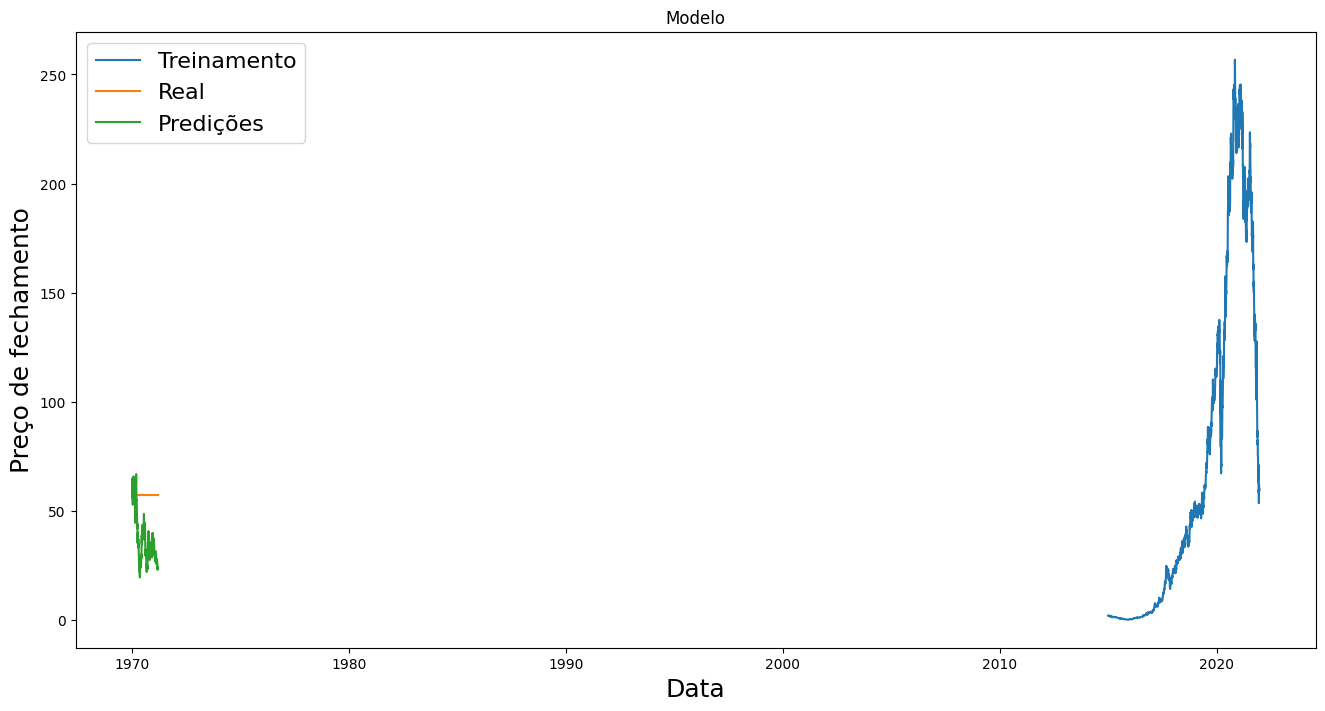

In [ ]:
plt.figure(figsize= (16,8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [ ]:
df_teste.sort_index()

df_teste

,Close,predicoes
0,57.615917,57.712246
1,57.615917,56.256008
2,57.615917,56.288876
3,57.615917,61.191395
4,57.615917,63.486511
...,...,...
428,57.615917,23.975985
429,57.615917,23.152693
430,57.615917,23.360378
431,57.615917,24.172146


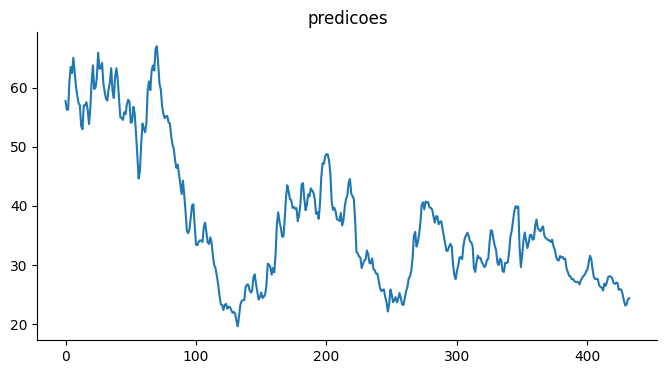

In [ ]:
from matplotlib import pyplot as plt
df_teste['predicoes'].plot(kind='line', figsize=(8, 4), title='predicoes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Predição para acertar qual lado o mercado vai

#calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0,
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0,
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
1,57.615917,56.256008,0.0,-0.025233,False,False,True,0.0
2,57.615917,56.288876,0.0,0.000584,False,True,False,0.0
3,57.615917,61.191395,0.0,0.087096,False,True,False,0.0
4,57.615917,63.486511,0.0,0.037507,False,True,False,0.0
5,57.615917,62.436718,0.0,-0.016536,False,False,True,0.0
...,...,...,...,...,...,...,...,...
428,57.615917,23.975985,0.0,-0.042539,False,False,True,0.0
429,57.615917,23.152693,0.0,-0.034338,False,False,True,0.0
430,57.615917,23.360378,0.0,0.008970,False,True,False,0.0
431,57.615917,24.172146,0.0,0.034750,False,True,False,0.0


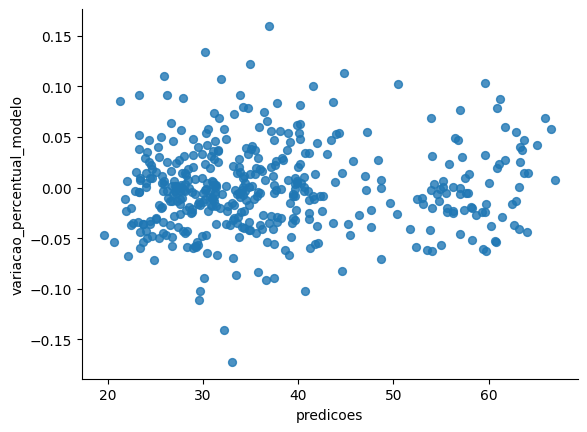

In [ ]:
#  predicoes vs variacao_percentual_modelo


df_teste.plot(kind='scatter', x='predicoes', y='variacao_percentual_modelo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.0
True     0.0
Name: variacao_percentual_acao_abs, dtype: float64
nan
0.5439814814814815
0.0


<ipython-input-29-7d5389967dff>:8: RuntimeWarning: invalid value encountered in scalar divide
  ganho_sobre_perda = media_lucro[1]/media_lucro[0]


In [ ]:
import yfinance as yf # import the yfinance library and give it the alias 'yf'
import pandas_datareader as pdr # import the pandas_datareader library and give it the alias 'pdr'
from datetime import datetime, timedelta

data_hoje = datetime.now()

#se quiser escolher um dia, basta fazer assim

#data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:

    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)

else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)

# Use yfinance to fetch data instead of pandas_datareader
acao = 'MGLU3.SA' # Replace with the correct stock ticker if needed
cotacoes = yf.download(acao, start=inicial, end=final)

ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 21ms/step
[[11.034397]]
